In [2]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from scipy.stats import entropy
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import make_scorer, confusion_matrix, classification_report
from scipy.stats import norm

In [3]:
data = pd.read_csv('creditcard_data.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [62]:
x = data.drop(['Class','Time','Amount'], axis=1)
data['Class'].unique()

array([0, 1], dtype=int64)

In [63]:
y=data['V1'].copy()
y.head()

0   -1.359807
1    1.191857
2   -1.358354
3   -0.966272
4   -1.158233
Name: V1, dtype: float64

In [64]:
#scaler = StandardScaler()
#x_scaled = scaler.fit_transform(x)


In [65]:
mu, sigma = norm.fit(y)

(array([1.19300593e-06, 0.00000000e+00, 0.00000000e+00, 1.19300593e-06,
        1.19300593e-06, 2.38601187e-06, 5.96502966e-06, 1.55090771e-05,
        1.43160712e-05, 2.14741068e-05, 3.45971720e-05, 6.20363085e-05,
        8.47034212e-05, 1.34809670e-04, 2.93479459e-04, 7.67102815e-04,
        2.21183300e-03, 9.07638914e-03, 1.16463625e-01, 2.10583442e-01]),
 array([-56.40750963, -53.46438765, -50.52126567, -47.57814369,
        -44.63502171, -41.69189972, -38.74877774, -35.80565576,
        -32.86253378, -29.9194118 , -26.97628982, -24.03316784,
        -21.09004586, -18.14692388, -15.2038019 , -12.26067991,
         -9.31755793,  -6.37443595,  -3.43131397,  -0.48819199,
          2.45492999]),
 <BarContainer object of 20 artists>)

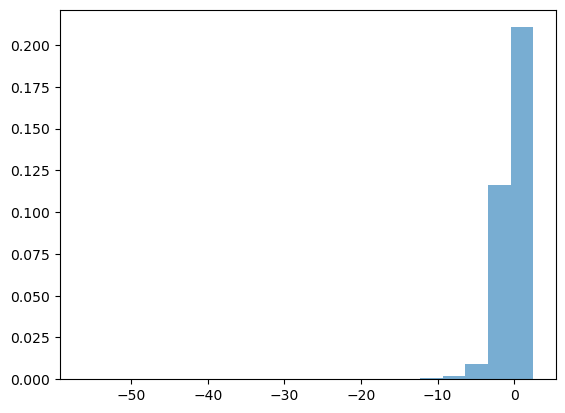

In [66]:
plt.hist(y, bins=20, density=True, alpha=0.6)


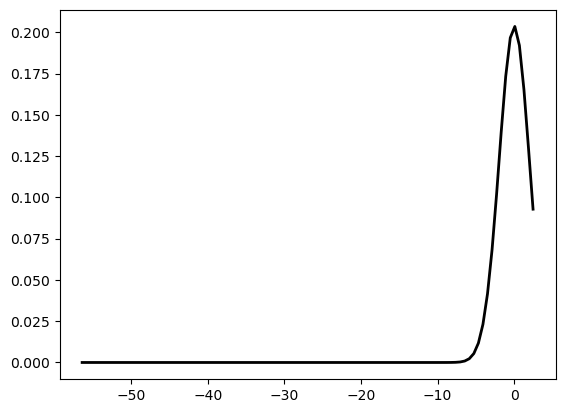

In [67]:
z = np.linspace(y.min(), y.max(), 100)

    # Calculate the corresponding Gaussian distribution values
p = norm.pdf(z, mu, sigma)

# Plot the Gaussian distribution curve
plt.plot(z, p, 'k', linewidth=2)

In [68]:
x.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [69]:
anomaly_probabilities = {}

In [178]:
for column in x.columns:
    feature_data = x[column].dropna() 
    feature_data.head()
    mu, sigma = norm.fit(feature_data)
    pdf_values = norm.pdf(feature_data, mu, sigma)
    probabilities = pdf_values / pdf_values.sum()
   
    x[f'{column}_probabilities'] = probabilities
    #anomaly_probabilities[column] = 1 - pdf_values
    print( pdf_values)

prob_cols = [col for col in x.columns if col.endswith('_probabilities')]
x['joint_probability'] = np.prod(x[prob_cols], axis=1)
print(x[['joint_probability']])
#x['pdf_values'] = np.prod(x.filter(like='_pdf_values'), axis=1)

#x['pdf_values'] = np.prod([pdf_values for column in x.columns], axis=1)
#print(x[['pdf_values']])
   # print( anomaly_probabilities[column])

[0.16006051 0.16925481 0.16014293 ... 0.1899108  0.12600446 0.20214869]
[0.24135706 0.23847393 0.17380261 ... 0.24145724 0.23760453 0.22944151]
[0.06494165 0.26152916 0.13278687 ... 0.10690045 0.02646755 0.23633267]
[0.17545038 0.26799839 0.27180917 ... 0.24592176 0.26072389 0.25023402]
[0.28048311 0.28876381 0.27045302 ... 0.2371539  0.04701474 0.27840069]
[0.28194296 0.29887372 0.1201479  ... 0.21840743 0.02250044 0.26836522]
[0.31649206 0.3218309  0.26280048 ... 0.32242204 0.31333424 0.27650433]
[0.33288533 0.33317704 0.32691854 ... 0.3239977  0.28014468 0.2841615 ]
[0.34375462 0.35344395 0.14038424 ... 0.31515972 0.33605622 0.34072195]
[0.36511771 0.36210623 0.35978748 ... 0.24518765 0.33181662 0.3425826 ]
[0.3377464  0.1121815  0.32413222 ... 0.38663895 0.36032578 0.06494484]
[0.32979508 0.22618322 0.3983889  ... 0.26232878 0.39846533 0.25096146]
[0.24406834 0.35524532 0.30915754 ... 0.19032162 0.3940668  0.23169398]
[0.39481485 0.41151907 0.40998416 ... 0.32475799 0.36113118 0.37

E:\python anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:2085: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


[278090.16459148 228421.17184451 219812.5564701  ... 272206.82562496
 244170.61717724 264708.91653131]
[277772.71091118 253931.10195514 304228.56264145 ... 358017.83888683
  15037.2561958  283521.64118725]
[279033.24139452 240381.43805349 119986.98063073 ... 326929.27837675
   9878.29246155 304418.91693917]
[323118.41040304 305058.44185795 421673.65693828 ... 303017.26183837
 333417.40626169 415825.33906979]
[443101.45262211 442151.1002283  461118.83831187 ... 468878.38631105
 481945.80392706 489172.33422501]
[229508.89706755 212697.27474811 134750.67993491 ... 272230.45643247
 242209.97750262 234593.85024349]
[264891.10643196 272242.81581488 277825.15787576 ... 324979.88324423
 336406.85680298 316201.4231374 ]
[246502.06770071  89415.1923136  265500.26029654 ... 163575.48393579
 209740.47720738  39489.25603434]
[317991.08524468 248346.34106018 221141.23534493 ... 301820.61110246
 221000.00533815 287455.59972672]
[270510.01985645 238345.28450047 283102.36971183 ... 201959.72454937
 180

ValueError: Length of values (0) does not match length of index (284806)

In [189]:
missing_values = x['joint_probability'] .isnull().sum()
print(missing_values)

0


In [190]:
 x['joint_probability_scaled']  =  x['joint_probability']  /  x['joint_probability'] .sum()

In [191]:
#x['Anomaly_Probability'] =  -  (x['pdf_values']) 
#print(x['Anomaly_Probability'])

In [192]:
#x['Anomaly_Probability'] = np.prod([anomaly_probabilities[column] for column in x.columns], axis=0)
#print(x[['Anomaly_Probability']])



In [193]:
 x['joint_probability_scaled'] .describe()

count    2.848060e+05
mean     3.511162e-06
std      8.043658e-06
min      0.000000e+00
25%      1.862574e-09
50%      1.388442e-07
75%      2.437809e-06
max      1.343834e-04
Name: joint_probability_scaled, dtype: float64

In [377]:
x['log_joint_probability_scaled'] = - np.log(x['joint_probability_scaled'])

E:\python anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [379]:
 x['log_joint_probability_scaled'] .describe()

count    2.848060e+05
mean              inf
std               NaN
min      8.914814e+00
25%      1.292441e+01
50%      1.578991e+01
75%      2.010131e+01
max               inf
Name: log_joint_probability_scaled, dtype: float64

In [434]:
threshold =  2.010131e+01**1000
x['Is_Anomaly'] = x['log_joint_probability_scaled'] > threshold
print(x[['Is_Anomaly']])


OverflowError: (34, 'Result too large')

In [435]:
y=data['Class'].copy()

In [436]:
anomaly_count = x['Is_Anomaly'].astype(int)

print(f" Anomalies: {anomaly_count}")

 Anomalies: 0         0
1         0
2         0
3         0
4         0
         ..
284801    0
284802    0
284803    0
284804    0
284805    0
Name: Is_Anomaly, Length: 284806, dtype: int32


In [437]:
 sum(anomaly_count)/len(y)

0.001836337717604264

In [438]:
sum(y)/len(y)

0.001727491696101908

In [439]:
print(confusion_matrix(y, anomaly_count ))
print(classification_report(y, anomaly_count))

[[283911    403]
 [   372    120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284314
           1       0.23      0.24      0.24       492

    accuracy                           1.00    284806
   macro avg       0.61      0.62      0.62    284806
weighted avg       1.00      1.00      1.00    284806

